## Updating already-loaded material

This test shows an example of updating already-loaded material.

In [1]:
import lmenv
env = lmenv.load('.lmenv')

In [2]:
import os
import imageio
import pandas as pd
import numpy as np
import timeit
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import lmscene
import lightmetrica as lm

In [3]:
%load_ext lightmetrica_jupyter

In [4]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64


In [5]:
camera = lm.load_camera('camera_main', 'pinhole',
    position=[5.101118, 1.083746, -2.756308],
    center=[4.167568, 1.078925, -2.397892],
    up=[0,1,0],
    vfov=43.001194,
    aspect=16/9)
material = lm.load_material('obj_base_mat', 'diffuse',
    Kd=[.8,.2,.2])
model = lm.load_model('model_obj', 'wavefrontobj',
    path=os.path.join(env.scene_path, 'fireplace_room/fireplace_room.obj'),
    base_material=material)
accel = lm.load_accel('accel', 'sahbvh')
scene = lm.load_scene('scene', 'default', accel=accel)
scene.add_primitive(camera=camera)
scene.add_primitive(model=model)
scene.build()

[I|0.010] Loading asset [name='camera_main']
[I|0.010] Loading asset [name='obj_base_mat']
[I|0.011] Loading asset [name='model_obj']
[I|0.011] .. Loading OBJ file [path='fireplace_room.obj']
[I|0.011] .. Loading MTL file [path='fireplace_room.mtl']


[I|0.339] Loading asset [name='accel']
[I|0.339] Loading asset [name='scene']
[I|0.343] Building acceleration structure [name='accel']
[I|0.343] .. Flattening scene
[I|0.383] .. Building


In [6]:
film = lm.load_film('film_output', 'bitmap', w=1920, h=1080)
renderer = lm.load_renderer('renderer', 'raycast', scene=scene, output=film)
renderer.render()

[I|1.025] Loading asset [name='film_output']
[I|1.104] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

{'elapsed': 2.655965284}

Text(0.5, 1.0, 'orig')

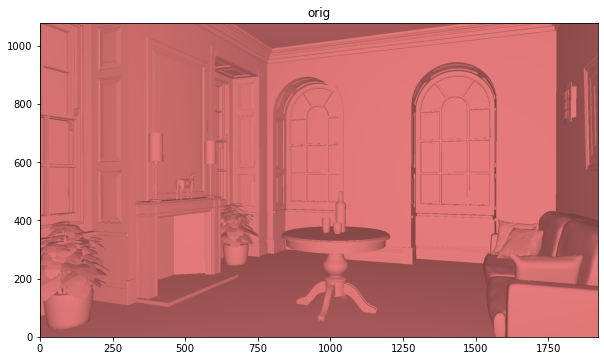

In [7]:
img = np.copy(film.buffer())
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
ax.set_title('orig')

In [8]:
# Replace `obj_base_mat` with different color
# Note that this is not trivial, because `model::wavefrontobj`
# already holds a reference to the original material.
lm.load_material('obj_base_mat', 'diffuse', Kd=[.2,.8,.2])

[I|5.109] Loading asset [name='obj_base_mat']
[I|5.109] .. Asset [name='obj_base_mat'] has been already loaded. Replacing..


In [9]:
renderer.render()

  0%|          | 0/2073600 [00:00<?, ?it/s]

{'elapsed': 2.553359881}

Text(0.5, 1.0, 'modified')

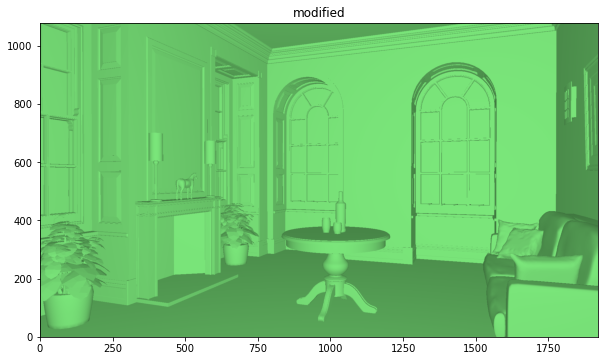

In [10]:
img = np.copy(film.buffer())
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
ax.set_title('modified')